# Aim: To forecast the WPI for a given series

###### Forecasting "All_commodities" Time Series Data collected from https://data.gov.in/resource/wholesale-price-index-base-year-2011-12-till-last-month

Prepared by : Gururaja - 24PGAI0059;  Praveen - 24PGAI0068; Kishnu - 24PGAI0042

In [125]:
#import all the required librarires

import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn
from sklearn.metrics import mean_squared_error
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

## 1. Read and understand the Data

In [126]:
data_main=pd.read_csv('WPI_dataset.csv',index_col='date',parse_dates=True)
data_main.head()


,wpi,I PRIMARY ARTICLES,(A). FOOD ARTICLES,a. FOOD GRAINS (CEREALS+PULSES),a1. CEREALS,Paddy,Wheat,Jowar,Bajra,Maize,...,Football,Table Tennis Table,d. Manufacture of games and toys,Playing Cards,Carrom board,Plastic moulded-others toys,Non Mechanical Toys,e. Manufacture of medical and dental instruments and supplies,Intraocular Lens,IV FOOD INDEX
date,,,,,,,,,,,,,,,,,,,,,
2012-01-04,104.7,107.1,106.2,104.8,104.6,104.2,104.6,98.3,107.7,107.9,...,105.4,105.0,104.6,101.7,107.4,106.7,107.0,115.0,115.0,105.9
2012-01-05,105.3,107.5,106.7,106.0,104.8,104.2,105.4,98.2,109.3,105.5,...,105.7,105.0,104.8,102.5,107.5,106.3,107.0,115.0,115.0,106.5
2012-01-06,105.3,107.9,109.3,107.4,105.9,107.0,104.4,97.0,107.0,107.2,...,105.7,107.3,105.9,105.3,107.5,106.0,107.0,115.0,115.0,108.4
2012-01-07,106.2,111.4,111.3,111.5,108.8,111.0,105.8,93.7,113.9,111.3,...,105.8,107.3,105.5,105.1,107.4,105.3,107.0,115.0,115.0,110.4
2012-01-08,106.9,112.7,111.2,117.4,114.8,114.0,116.0,96.2,120.7,117.8,...,105.7,107.3,104.3,104.1,107.6,103.7,107.0,115.0,115.0,111.1


In [127]:
data_main.tail()

,wpi,I PRIMARY ARTICLES,(A). FOOD ARTICLES,a. FOOD GRAINS (CEREALS+PULSES),a1. CEREALS,Paddy,Wheat,Jowar,Bajra,Maize,...,Football,Table Tennis Table,d. Manufacture of games and toys,Playing Cards,Carrom board,Plastic moulded-others toys,Non Mechanical Toys,e. Manufacture of medical and dental instruments and supplies,Intraocular Lens,IV FOOD INDEX
date,,,,,,,,,,,,,,,,,,,,,
2023-01-03,151.0,175.2,178.8,183.0,183.6,175.4,187.1,208.3,225.1,193.7,...,155.5,145.1,157.6,160.0,181.9,146.6,207.0,166.3,166.3,172.1
2023-01-04,151.1,177.8,182.1,183.7,183.5,176.2,186.4,208.0,229.6,189.8,...,159.7,145.1,159.4,163.7,181.9,147.2,207.0,166.3,166.3,174.0
2023-01-05,149.4,175.1,181.3,183.2,183.1,177.2,184.9,209.2,229.4,184.5,...,160.8,145.1,158.9,161.2,184.4,148.0,207.8,163.6,163.6,172.9
2023-01-06,149.0,176.3,184.9,185.2,184.5,178.2,187.3,219.5,226.7,181.9,...,158.9,145.1,159.7,163.1,185.8,147.6,207.8,164.5,164.5,175.2
2023-01-07,151.9,190.5,204.4,187.4,186.4,181.2,187.5,224.1,226.9,186.0,...,158.9,145.7,159.7,161.9,186.3,148.6,207.8,164.5,164.5,187.7


In [128]:
data_main.index.dtype #checking for the time series format of information available in the data 

dtype('<M8[ns]')

In [129]:
data_main.shape

(136, 869)

In [130]:
wpi_data = data_main.iloc[:, [0]]
wpi_data.info()
wpi_data.describe()#check the numerical data statitics ; finding any outliers or extreme minimum or maximum values

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 136 entries, 2012-01-04 to 2023-01-07
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   wpi     136 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


,wpi
count,136.000000
mean,121.431618
std,14.141270
min,104.700000
25%,111.475000
50%,116.350000
75%,123.450000
max,154.000000


## 2. Exploratory data analysis

In [131]:
wpi_data.isnull().sum() # to find missing values

wpi    0
dtype: int64

### outliers rectification

In [132]:
wpi_data.describe(percentiles=[.25,0.5,0.75,0.90,0.95,0.99])

,wpi
count,136.000000
mean,121.431618
std,14.141270
min,104.700000
25%,111.475000
50%,116.350000
75%,123.450000
90%,149.950000
95%,151.900000
99%,154.000000


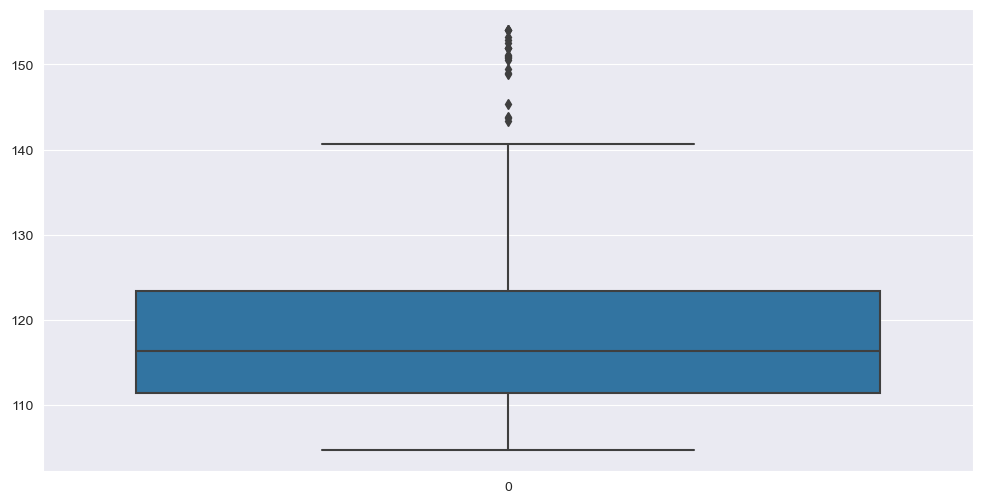

In [133]:
plt.figure(figsize=(12,6))
sns.boxplot(wpi_data['wpi']) #import seaborn as sns
plt.show()

##### Observations: Data points is not too far from interquartile range

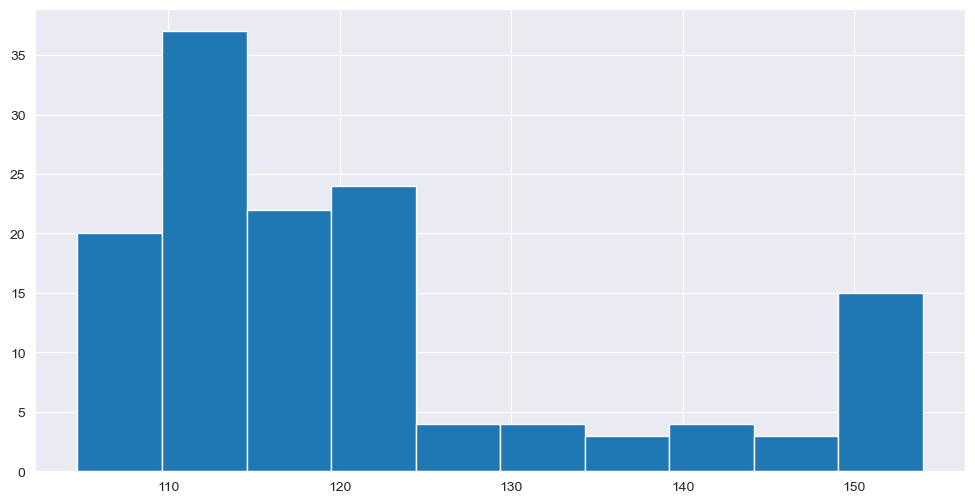

In [134]:
plt.figure(figsize=(12,6))
plt.hist(wpi_data['wpi'])
plt.show()

In [135]:
np.nanmedian(wpi_data['wpi'])

116.35

# Data Preperation

In [136]:
wpi_data.head()

,wpi
date,
2012-01-04,104.7
2012-01-05,105.3
2012-01-06,105.3
2012-01-07,106.2
2012-01-08,106.9


### Time series Decomposition

In [137]:
wpi_data.index.dtype

dtype('<M8[ns]')

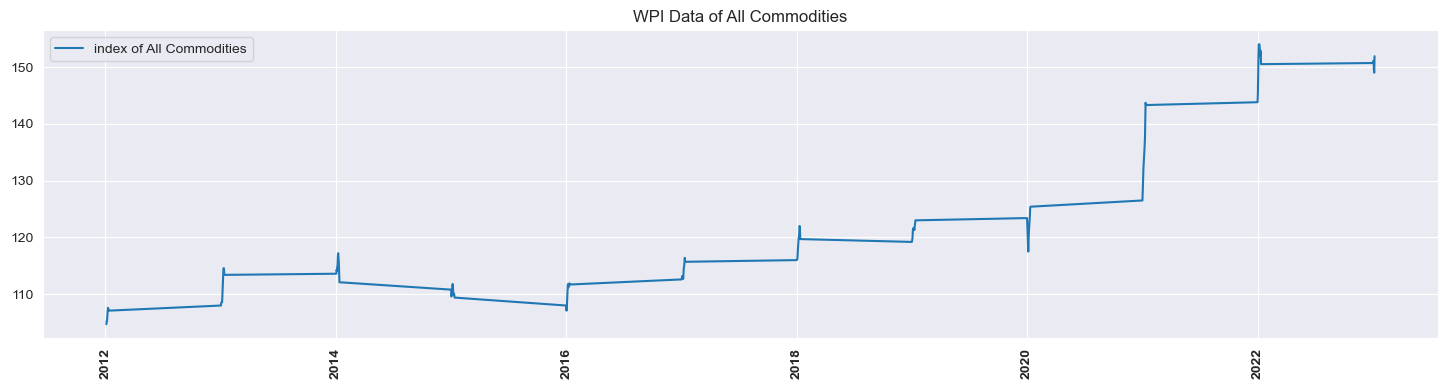

In [138]:
plt.figure(figsize=(18,4))
plt.plot(wpi_data,label="index of All Commodities")
plt.legend(loc='best')
plt.title("WPI Data of All Commodities")
plt.xticks(rotation=90,fontweight="bold")
plt.show()

# Additive seasonal decomposition

In [139]:
from pylab import rcParams
from scipy.fftpack import fftfreq #fast courier transform
#fourier analysis is a method for exporessing as a sum of periodic components and for recovering the signal from those components

In [140]:
import statsmodels.api as sm

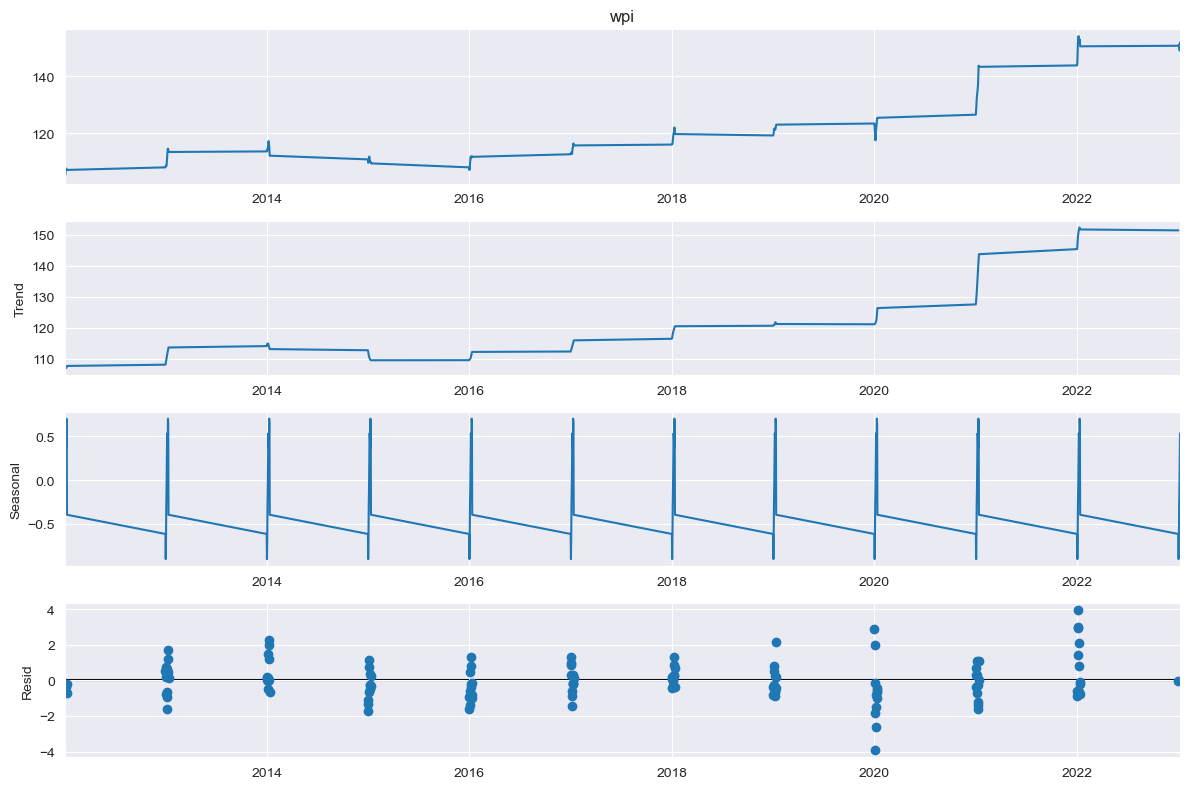

In [141]:
rcParams['figure.figsize']=12,8
decomposition=sm.tsa.seasonal_decompose(wpi_data['wpi'],model='additive',period=12) #additive seasonal
#print(decomposition.trend), #seasonal, .resid
fig=decomposition.plot()
plt.show()

# Multiplicative seasonal decomposition

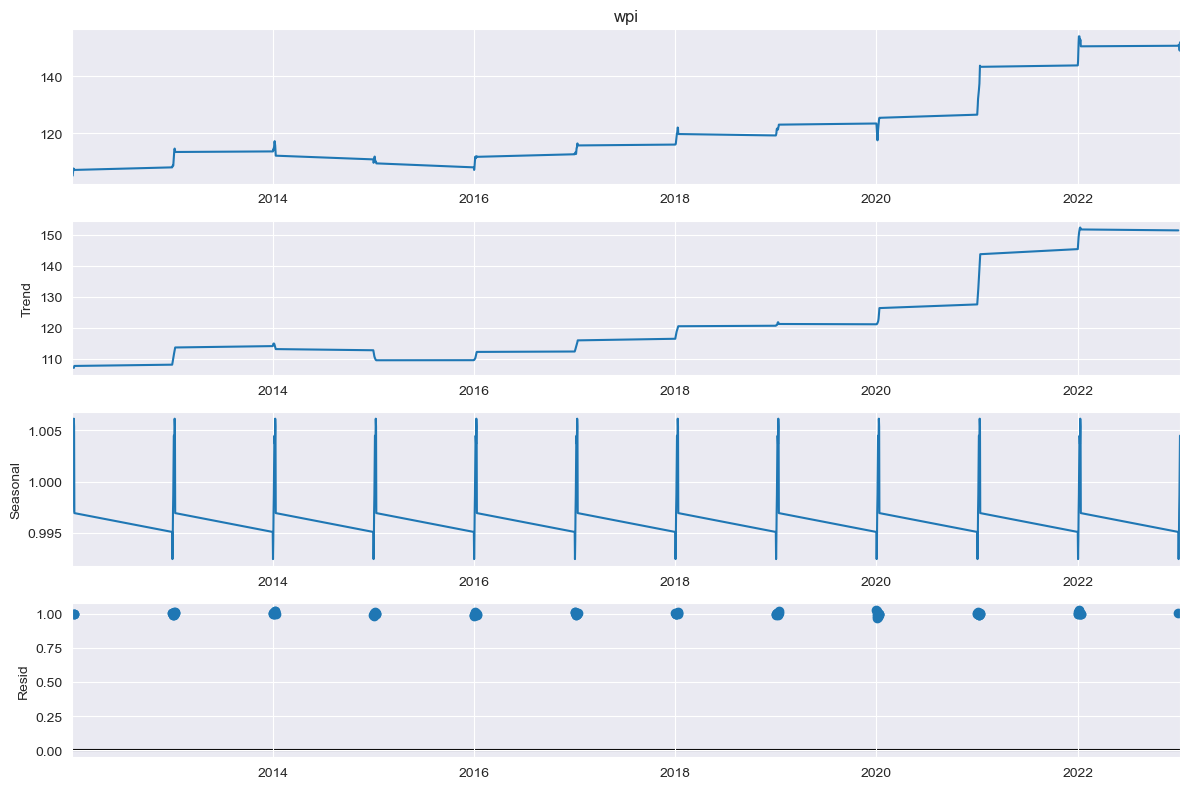

In [142]:
decomposition=sm.tsa.seasonal_decompose(wpi_data['wpi'],model='multiplicative',period=12) #multiplicative seasonal
fig=decomposition.plot()
plt.show()

#### it is observed that a constant residual of 1 , so additive model is chose as residual error is 1 in multiplicative error
Inference: the data contains level, trend but not seasonality

# Split the data into train and test series

In [143]:
train_len=122
train=wpi_data[0:train_len]
test=wpi_data[train_len : ]

In [144]:
train.head()

,wpi
date,
2012-01-04,104.7
2012-01-05,105.3
2012-01-06,105.3
2012-01-07,106.2
2012-01-08,106.9


In [145]:
test

,wpi
date,
2022-01-06,154.0
2022-01-07,154.0
2022-01-08,153.2
2022-01-09,151.9
2022-01-10,152.9
2022-01-11,152.5
2022-01-12,150.5
2023-01-01,150.7
2023-01-02,150.9


we build a time series forecast model and compare the RMSE and MAPE values for the models . Lower values of RMSE are desired to conclude that a model performs better accurary .
accuracy is calculated as 100 - MAPE. Lower the MAPE value, higher is the accurary

# Building an ARIMA Model for forecasting

#### To make the series stationary, we need to perform transformation and differencing

### Check wether the time series is stationary

##### average / mean / expected value of the time series is constant through out the different time period

##### standard deviation / variance of the time series is constant throu out the different period

##### there is no seasonality in the data

### Augumented Dicky Fuller test (ADF)test : To inference if the time series is stationary or not using p-values

In [146]:
from statsmodels.tsa.stattools import adfuller
#hypothesis test
#Null hypothesis - the time series is stationary
#alternate hypothesis - the time series is not stationary

#p value < 0.05 # 95% confidence that you accept the null hypothesis - the  TS is stationary
#p-value >=0.05 # reject the Null hypothesis - TS is not stationary

In [147]:
adf_test= adfuller(wpi_data['wpi'])

In [148]:
print(adf_test)

(0.8200648492170542, 0.9919532446906909, 2, 133, {'1%': -3.480500383888377, '5%': -2.8835279559405045, '10%': -2.578495716547007}, 325.90420607677027)


In [149]:
print ('ADF Statistic : % f' %adf_test[0])

ADF Statistic :  0.820065


In [150]:
print('critical values @ 0.05 : %.2f' %adf_test[4]['5%'])

critical values @ 0.05 : -2.88


In [151]:
print('p-value : %f' %adf_test[1])

p-value : 0.991953


#### Inference : p-value is greater than 0.05, which means that the series is not stationary

## Kwitkowski - phillips-schmidt-shin test (kpss)test

In [152]:
from statsmodels.tsa.stattools import kpss

In [153]:
kpss_test=kpss(wpi_data['wpi'])

In [154]:
print('KPSS Statistic : %f' %kpss_test[0])

KPSS Statistic : 1.595203


In [155]:
print('Critical Values @ 0.05 : %.2f' %kpss_test[3]['5%'])

Critical Values @ 0.05 : 0.46


In [156]:
print('p-value : %f' % kpss_test[1])

p-value : 0.010000


#### Inference : p-value is less than 0.05, which means that the series is not stationary which is opposite to dickyfuller test

## Box cox transformation to make variance constant #Differencing


differencing methodology
upward trend TS Data
intution

2,     3.5,   4,  5.5,  6.2,  7.5
null    2,   3.5,  4,    5.5,  6.2,  7.5

TS = Null, 1.5,0.5,1.5,0.7 


TS which is not stationary

↓

Transformation / differencing timeseries -> stationary

↓

Model this stationary data using TS models

↓

Predict the new values -> transformed TS

↓

reverse transform the TS - > original data

In [157]:
print(wpi_data.columns)
wpi_data

Index(['wpi'], dtype='object')


,wpi
date,
2012-01-04,104.7
2012-01-05,105.3
2012-01-06,105.3
2012-01-07,106.2
2012-01-08,106.9
...,...
2023-01-03,151.0
2023-01-04,151.1
2023-01-05,149.4


In [158]:
from scipy.stats import boxcox #box,cox


Box-Cox Transformation : Transforms non-gaussian distribution data into gaussian ; power distributions to normal distributions and then shifting it by 1 unit and then differencing 

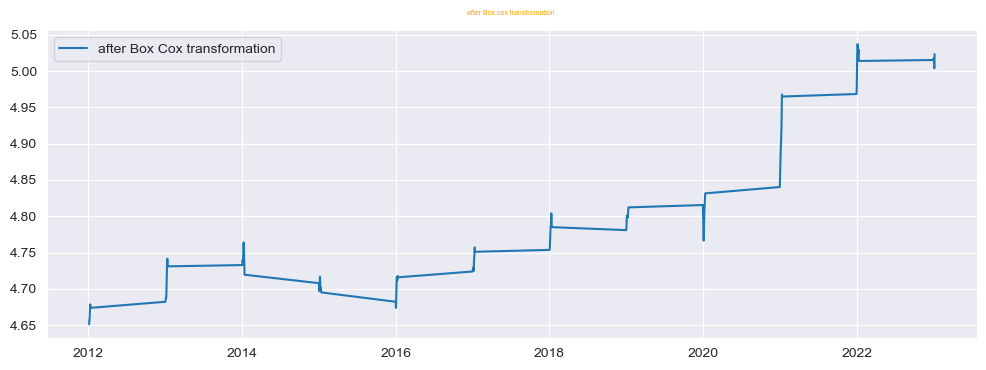

In [159]:
data_boxcox=pd.Series(boxcox(wpi_data['wpi'], lmbda=0), index=wpi_data.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label = 'after Box Cox transformation')
plt.legend(loc='best')
plt.title('after Box cox transformation \n', fontdict = { 'fontsize': 5, 'color':'Orange'})
plt.show()



## Differencing to remove trend

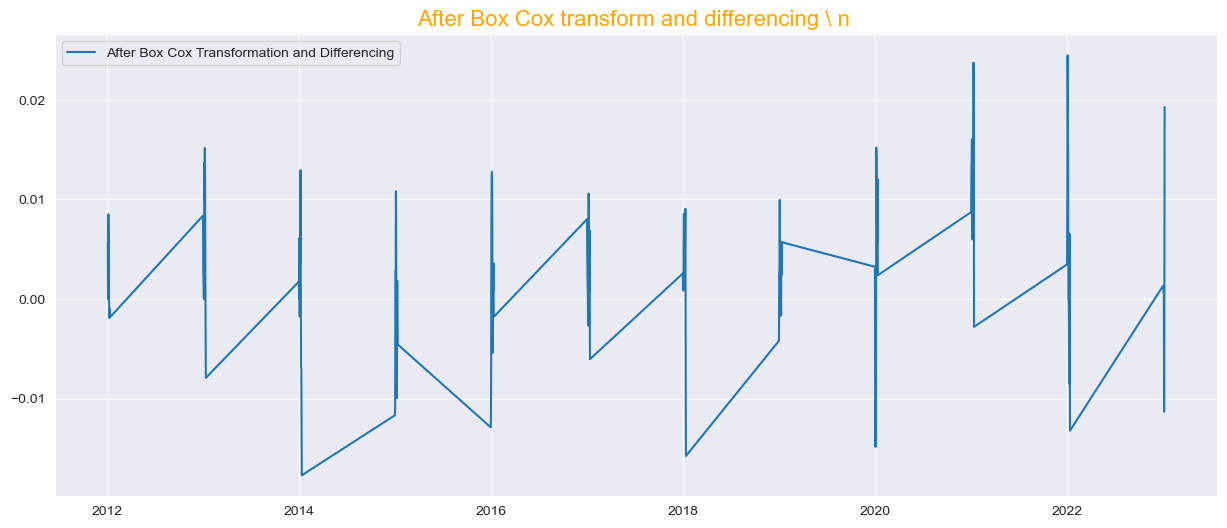

In [160]:
# Compute differences in 'data_boxcox'

data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), index=wpi_data.index)

plt.figure(figsize=(15,6))
plt.plot(data_boxcox_diff, label = "After Box Cox Transformation and Differencing")
plt.legend(loc='best')
plt.title ("After Box Cox transform and differencing \ n ", fontdict={'fontsize':16, 'fontweight' : 5, 'color' : "orange"})
plt.show()

In [161]:
# Now, 'data_boxcox_diff' contains the differences

print
(data_boxcox_diff)

date
2012-01-04         NaN
2012-01-05    0.005714
2012-01-06    0.000000
2012-01-07    0.008511
2012-01-08    0.006570
                ...   
2023-01-03    0.000662
2023-01-04    0.000662
2023-01-05   -0.011315
2023-01-06   -0.002681
2023-01-07    0.019276
Length: 136, dtype: float64

In [162]:
data_boxcox_diff.dropna(inplace=True) 
#after shifting the data, drop the first value which is NA

In [163]:
data_boxcox_diff.tail()

date
2023-01-03    0.000662
2023-01-04    0.000662
2023-01-05   -0.011315
2023-01-06   -0.002681
2023-01-07    0.019276
dtype: float64

In [164]:
#check now again for series has become stationary or not

## Augumented dicky fuller test

In [165]:
adf_test=adfuller(data_boxcox_diff)

print('ADF Statistic : % f' % adf_test[0])  #smaller value indicates higher stationarity, rejecting null hypothesis
print('p-value : %f' % adf_test[1])
print('Critical Values @ 0.05 : %.2f'% adf_test[4]['5%'])

ADF Statistic : -6.213553
p-value : 0.000000
Critical Values @ 0.05 : -2.88


In [166]:
#inference : p value is less than 0.05. which means that the series is stationary

## Kwitkowski - phillips-schmidt-shin test (kpss)test

In [167]:
kpss_test=kpss(data_boxcox_diff)

print('KPSS Statistic : %f' %kpss_test[0])

print('Critical Values @ 0.05 : %.2f' %kpss_test[3]['5%'])

print('p-value : %f' % kpss_test[1])

KPSS Statistic : 0.252848
Critical Values @ 0.05 : 0.46
p-value : 0.100000


In [168]:
#inference: p-value is greater than 0.05. means the series is stationary

In [169]:
#another one order difference this time series become stationary so d will be 1

# Train-test-split

In [170]:
train_data_boxcox      = data_boxcox[:train_len]
test_data_box          = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff  = data_boxcox_diff[train_len-1:]

#### proceeding towards building various AR models to forecast the series

first we need to care of the assumptions about the data and determine the parameters of the ARIMA (p,d,q) model, for d we already have the value

the next step in the ARIMA model is computing'p', or the order for the autoregression model, we can inspect the autocorrelation plot, which measures the correlation between the time-series data and a certain lag. Based on the presense or absence or correlation, we can determine whether the lag or order is needed or not

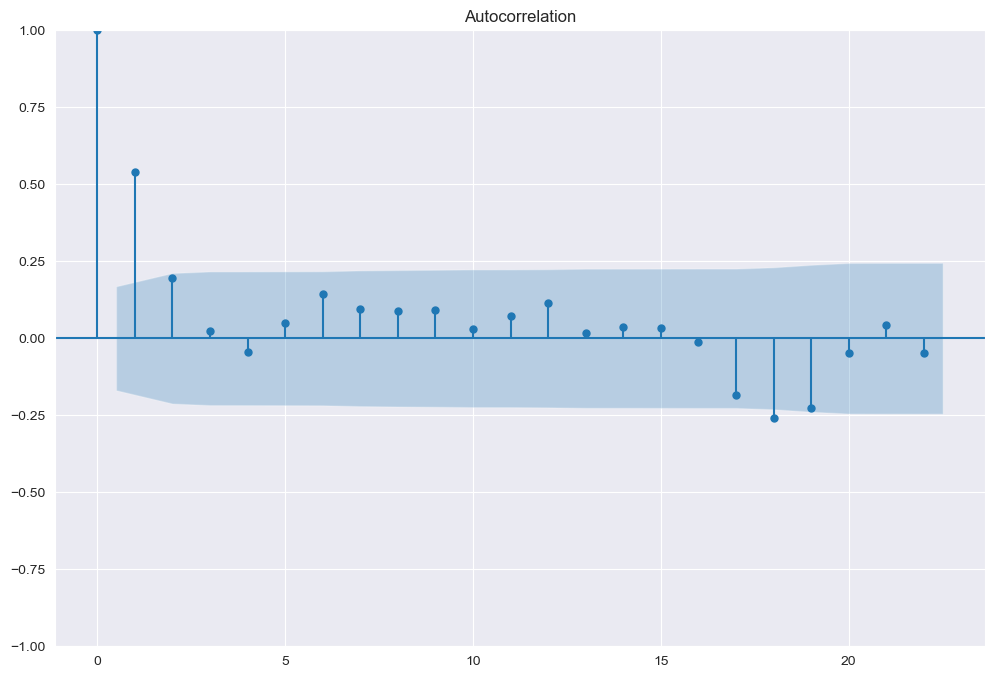

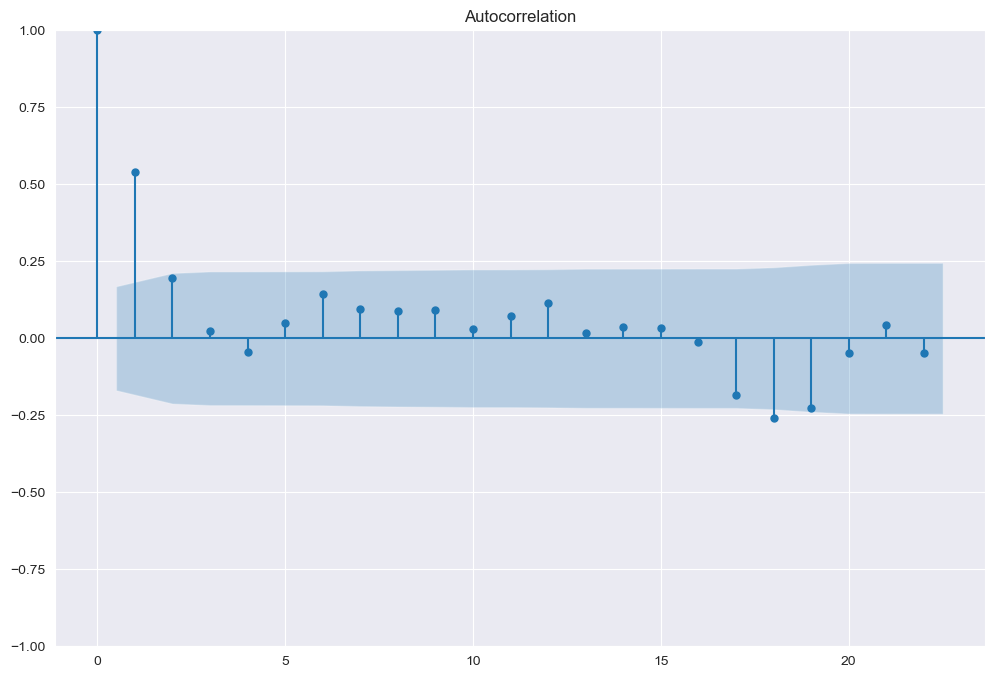

In [171]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data_boxcox_diff)


so we estimated similarly by looking at the PACF plot instead of the ACF plot . looking at the number of lags crossing the threshold, we can determine how much of the past would be significant enough to consider for the future. the ones with high correlation contribute more and would be enough to predict future values. from the plots above Moving Average parameter can be observed between 7 and 9

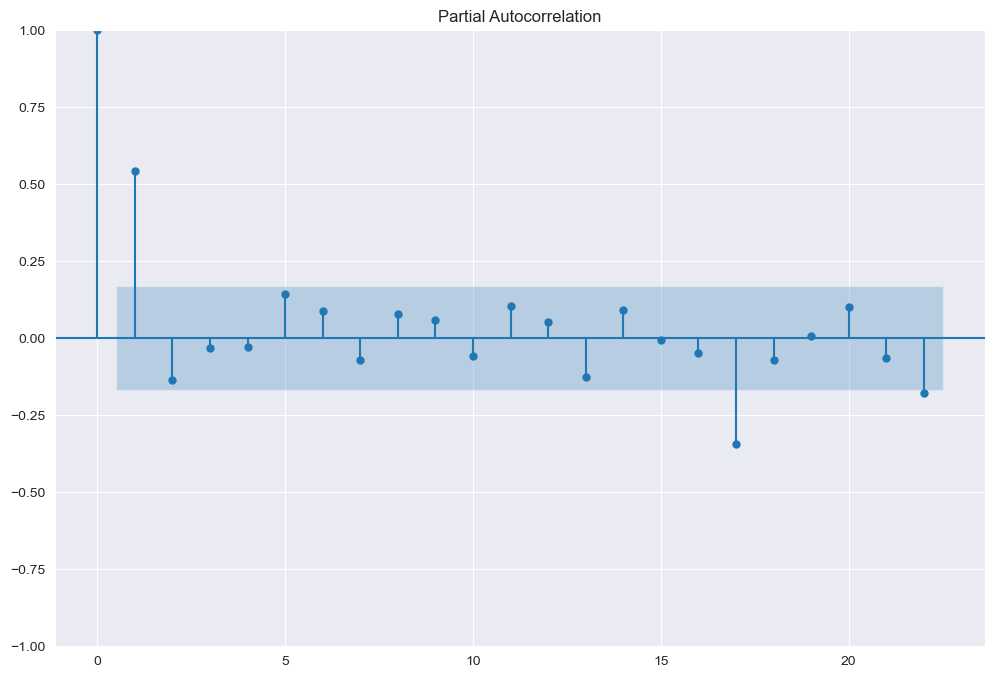

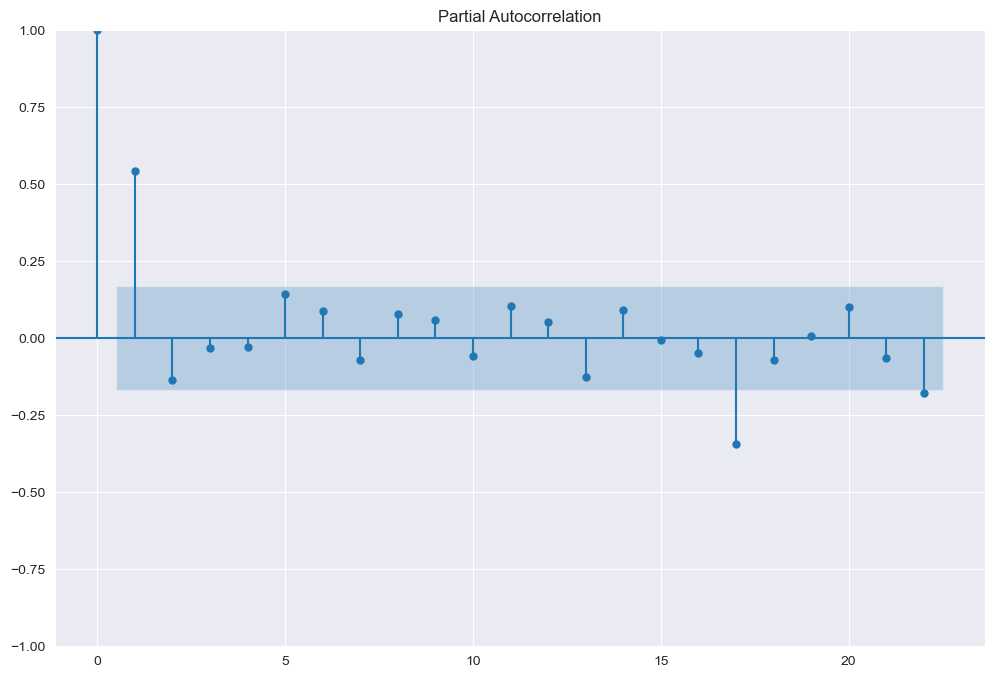

In [172]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data_boxcox_diff)

## fit ARIMA model

In [173]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data_boxcox_diff, order=(2, 1, 9))
model_fit = model.fit()

import warnings
warnings.filterwarnings('ignore')

In [174]:
print(model_fit.params)

ar.L1    -0.131240
ar.L2    -0.525746
ma.L1    -0.203031
ma.L2     0.178015
ma.L3    -0.394045
ma.L4    -0.361566
ma.L5    -0.021793
ma.L6     0.033940
ma.L7    -0.033856
ma.L8     0.121043
ma.L9    -0.019772
sigma2    0.000046
dtype: float64


In [175]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  135
Model:                 ARIMA(2, 1, 9)   Log Likelihood                 478.392
Date:                Fri, 20 Oct 2023   AIC                           -932.784
Time:                        18:29:11   BIC                           -898.010
Sample:                             0   HQIC                          -918.653
                                - 135                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1312      1.329     -0.099      0.921      -2.735       2.473
ar.L2         -0.5257      0.758     -0.693      0.488      -2.012       0.960
ma.L1         -0.2030      1.337     -0.152      0.879      -2.823       2.417
ma.L2          0.1780      0.984      0.181      0.856      -1.751       2.107
ma.L3         -0.3940      0.436     -0.904      0.366      -1.248       0.460
ma.L4         -0.3616      0.327     -1.106      0.269      -1.002       0.279
ma.L5         -0.0218      0.279     -0.078      0.938      -0.569       0.525
ma.L6          0.0339      0.235      0.145      0.885      -0.426       0.494
ma.L7         -0.0339      0.191     -0.178      0.859      -0.407       0.340
ma.L8          0.1210      0.199      0.610      0.542      -0.268       0.510
ma.L9         -0.0198      0.186     -0.107      0.915      -0.384       0.344
sigma2      4.577e-05   6.37e-06      7.190      0.000    3.33e-05    5.82e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.77
Prob(Q):                              0.92   Prob(JB):                         0.68
Heteroskedasticity (H):               1.92   Skew:                             0.13
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [176]:
# Recover original time series
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

In [177]:
print(data_boxcox_diff)

date
2012-01-05    0.005714
2012-01-06    0.000000
2012-01-07    0.008511
2012-01-08    0.006570
2012-01-09    0.006527
                ...   
2023-01-03    0.000662
2023-01-04    0.000662
2023-01-05   -0.011315
2023-01-06   -0.002681
2023-01-07    0.019276
Length: 135, dtype: float64


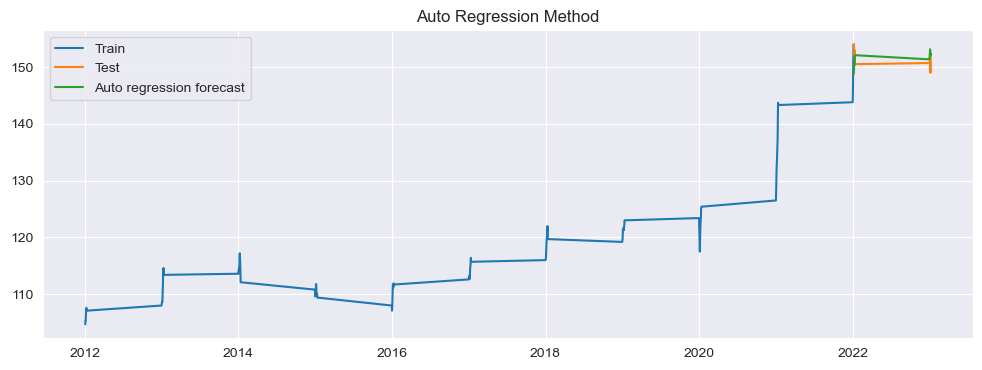

In [178]:
#Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['wpi'], label = 'Train')
plt.plot(test['wpi'], label = 'Test')
plt.plot(y_hat_ar['ar_forecast'] [test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

Auto regressive model: 
current value - dependent on previous value (how many previous values ) - ACF
Moving Average  - it depends on a lot of unknown cases - unpredictable inputs
integrated - difference based model

In [179]:
# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['wpi'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['wpi']-y_hat_ar['ar_forecast'][test.index.min():])/test['wpi'])*100,2)
print(rmse)
print(mape)

2.65
1.47


In [180]:
# Create a new date range
date_range = pd.date_range(start=wpi_data.index.min(), periods=len(wpi_data) + 12, freq='M')

# Extend DataFrame index
future_predict = model_fit.predict(start=0, end=len(wpi_data) + 11)
future_predict.index = date_range  # Set the new date range as the index

future_predict = future_predict.cumsum()
future_predict = future_predict.add(data_boxcox[0])
future_predict = np.exp(future_predict)

In [181]:
future_predict.tail(12)

2023-05-31    155.365095
2023-06-30    156.042334
2023-07-31    156.046221
2023-08-31    156.380933
2023-09-30    156.940154
2023-10-31    157.283968
2023-11-30    157.859463
2023-12-31    158.467725
2024-01-31    158.951905
2024-02-29    159.437980
2024-03-31    159.992349
2024-04-30    160.539625
Freq: M, Name: predicted_mean, dtype: float64

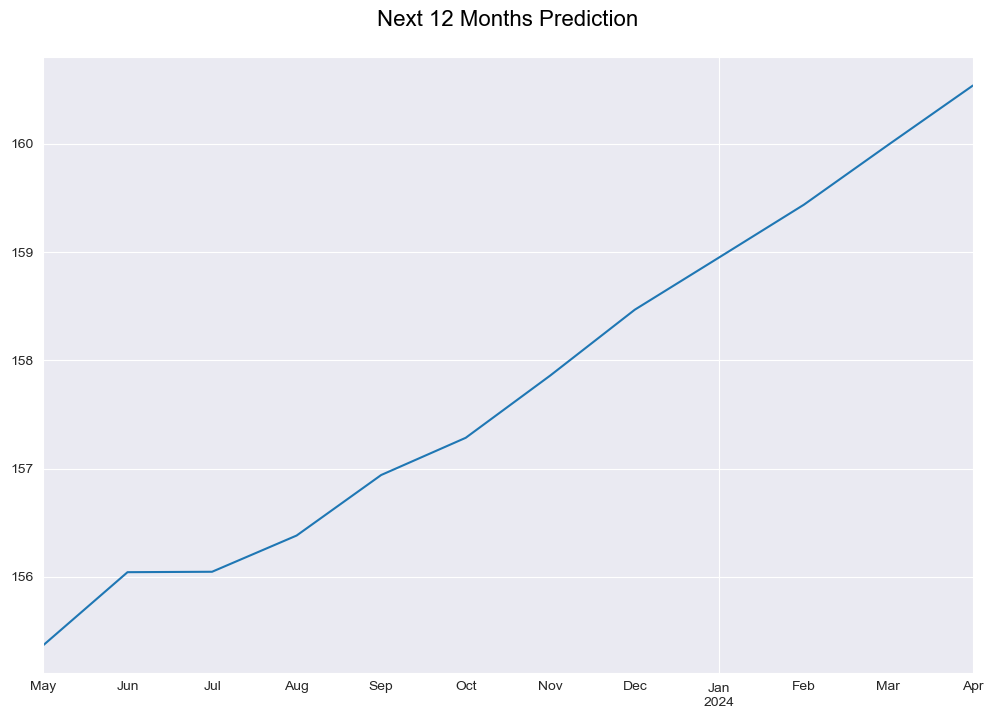

In [182]:
# Only plot the predicted values for the next 12 months
future_predict[len(wpi_data):].plot()
plt.title('Next 12 Months Prediction\n', fontdict={'fontsize': 16, 'fontweight' : 5, 'color': 'Black'})
plt.show()

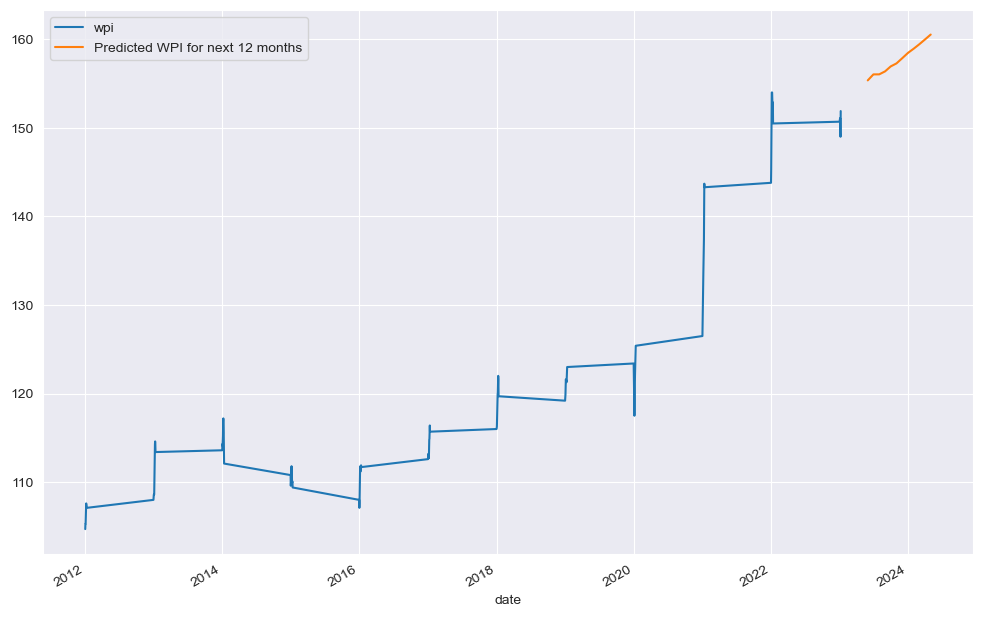

In [183]:
# Plot WPI data
wpi_data.plot(label='WPI')

# Plot future predictions starting from the day after WPI data ends
future_predict[len(wpi_data):].plot(label='Predicted WPI for next 12 months')

plt.legend()
plt.show()
